<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch3_1~5_pg_147~174.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 평가

- 머신러닝은 데이터 가공/변환, 모델 학습/예측, 평가의 프로세스로 구성
- 성능 평가 지표: 모델의 예측 성능을 평가하는 방법
- 회귀의 성능 평가 지표: 주로 예측값의 오차 평균값
- 분류의 성능 평가 지표: 정확도, 오차행렬, 정밀도, 재현율, F1 스코어, ROC/AUC
- 분류: 2개의 결과값만을 갖는 이진 분류와 여러개의 결정 클래스 값을 가지는 멀티 분류로 나뉨. 위 지표는 특히 이진 분류에서 중요함. 

# 1) 정확도(Accuracy)

- 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표
- 정확도 = 예측 결과가 동일한 데이터 건수/전체 예측 데이터 건 수
- 직관적으로 모델 예측 성능을 나타내는 평가 지표.
- 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있어, 이것 하나로 성능을 평가하지 않음.

In [1]:
import sklearn

print(sklearn.__version__)

1.0.2


- 사이킷런의 BestEstimator 클래스를 상속받아 아무런 학습을 하지 않고,  성별에 따라 생존자를 예측하는 단순한 Classifier 생성


In [5]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메서드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메서드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [6]:
#MyDummyClassifier을 이용해 앞 장의 타이타닉 생존자 예측을 수행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
import numpy as np

#Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

#머신러닝 알고리즘에 불필요한 속성제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA/session/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


- 단순한 알고리즘으로 예측을 했음에도 데이터 구성에 따라 정확도가 상당히 높은 수치가 나옴. -> 정확도 평가 지표의 문제점: 불균형한 레이블 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님.

# MINIST 데이터를 이용한 정확도 지표 문제점 확인

- 데이터 세트를 불균형하게 만들어 정확도 지표의 문제점 확인
- 전체 데이터의 10% 만 Ture 나머지느느 False

In [12]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass
  
  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)
  

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [13]:
# 불균형한 레이블 데이터 분포도 확인
print("레이블 테스트 세트 크기:", y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print("모든 예측을 0으로 하여도 정확도는 :{:.3f}".format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 :0.900


- 단순히 predict()의 결과를 np.zeros()로 모두 0 값으로 반환함에도 450개의 테스트 데이터 세트에 수행한 예측 정확도가 90이라는 기이한 결과.

# 2) 오차 행렬

- 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지 함께 보여주는 지표.
- TP,FP,FN,TN으로 값을 구분하고, 의미의 기준은 에측임. 
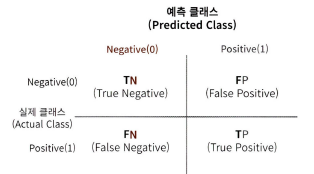

#사이킷런의 오차행렬 API: confusion_matrix()

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)
# TN = [0,0] 
# FP = [0,1]
# FN = [1,0]
# TP = [1,1]

array([[405,   0],
       [ 45,   0]])

- TN은 전체 450건 데이터 중 무조건 Negative로 예측해 True가 된 결과가 405건, FP는 1로 예측한 건수가 없어 0, N은  Positive 45건을 Negative로 예측해 False가 되어 45건, TP는 Positive로 예측한 건수가 없어 0건
- 위 값을 조합해 정확도, 정밀도, 재현율 등의 값을 알 수 있음.

# 3) 정밀도와 재현율

- positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
- 앞서 만든 MyFakeClassifier는 Positive로 예측한 TP 값이 없어서 정밀도와 재현율 모두 0이다.

- 정밀도: Positive로 예측한 대상 중 실제 Positive (TP/(FP+TP))
- 재현율(민감도, TRP): 실제 값이 Positive인 대상 중 예측이 Positive (TP/(FN+TP))

- 재현율이 중요한 경우: 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 큰 영향이 발생할 수 있는 경우 예) 암 판단, 보험 사기 -> FN을 낮추는 데 초점
- 정밀도가 중요한 경우: 실제 Negative 데이터를 잘못 Positive로 판단하게 되면 큰 영향이 발생할 수 있는 경우 예) 스팸 메일 -> FP를 낮추는 데 초점\

--> 위와 같은 특성으로 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용될 수 있다. 

#오차 행렬 및 정밀도, 재현율을 모두 구해서 예측 성능을 평가
- 사이킷런의 정밀도 계산: precision_score()
- 재현율 계산: recall_score()
- 평가 간편 적용:get_clf_eval()

In [18]:
from sklearn.metrics import accuracy_score,precision_score,precision_score,recall_score,confusion_matrix

def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  print('오차 행렬')
  print(confusion)
  print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f}'.format(accuracy,precision,recall))

- 로지스틱 회귀를 기반으로 타이타닉 생존자를 예측하고 예측 수행할 것

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA/session/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.20,random_state=11)

lr_clf=LogisticRegression()

lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492,정밀도:0.7742,재현율:0.7869


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


- 책과 다르게 정밀도와 재현율이 크게 다르지 않게 나옴

# 정밀도 재현율 트레이드 오프

- 분류 없무 특성항 정밀도나 재현율을 특별히 강조해야 할 경우 분류의 결정 임곗값을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다. 
- 하지만 둘은 상호 보완적인 관계이므로, 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다. = 트레이드 오프 관계

- 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는 지 계산하기 위해 개별 레이블별로 결정 확률을 구하고, 예측 확률이 큰 레이블 값으로 예측하게 되는데, 임계값은 정할 수 있다.
- predict_proba: 사이킷런에서 개별 데이터별로 예측 확률을 반환해주는 메서드. 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능, 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환. 
- 반환해주는 값은 첫 번째 열: 0에 대한 예측 확률, 두 번째 열: 1에 대한 예측 확률

In [22]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('pred_proba() 결과 Shape:{0}'.format(pred_proba.shape))
print('pred_proba() array에서 앞 3개만 샘플로 추출 \n:',pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한 눈에 확인
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측  \n',pred_proba_result[:3])

pred_proba() 결과 Shape:(179, 2)
pred_proba() array에서 앞 3개만 샘플로 추출 
: [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측  
 [[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


- 반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫 번째 칼럼과 두 번째 칼럼을 더하면 1이 된다. 
- 두 개의 확률 중 더 큰 값으로 predict 메서드가 최종 예측하고 있음. 

#사이킷런의 Binariazer 클래스

threshold를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성하여 임곗값보다 작으면 0, 크면 1로 반환

In [23]:
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]

#X의 개별 원소들이  threshold값보다 같거나 작으면 0을 크면 1을 반환
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

#입력된 X 데이터 세트에서  Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


- 1.1보다 같거나 작으면 0 크면 1로 반환

#Binarizer을 이용해 사이킷런 predict()의 의사(pseudo)코드 생성

In [26]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값, 분류 결정 임계값임
custom_threshold=0.5

#predict_proba() 반환값의 두번째 칼럼, 즉 positvie 클래스 칼럼 하나만 추출해 Binarizer 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)


binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

# 평가 지표 출력
get_clf_eval(y_test,custom_predict)  

오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492,정밀도:0.7742,재현율:0.7869


- Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤

In [27]:
custom_threshold=0.4
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도:0.8324,정밀도:0.7183,재현율:0.8361


- 임계를 낮추니 재현율이 놀라가고 정밀도가 떨어짐. 

# 임계값을 증가시키며 평가 지표를 조사

In [29]:
#테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds=[0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
  #thresholds list 객체 내의 값을 차례로 iteraction 하면서 evaluation 수행

  for custom_threshold in thresholds:
    binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict=binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도:0.8324,정밀도:0.7183,재현율:0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도:0.8492,정밀도:0.7656,재현율:0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492,정밀도:0.7742,재현율:0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도:0.8659,정밀도:0.8364,재현율:0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도:0.8771,정밀도:0.8824,재현율:0.7377


- 임곗값이 0.45일 경우 디폴트 0.5인 경우에 디폴트 0.5인 경우와 비교해서 정확도는 동일하고 정밀도는 약간 떨어졌으나 재현율이 오름
- 재현율을 향상시키면ㅅ너 다른 수치를 어느 정도 감소하는 희생을 해야한다면 0.45가 가장 적당

#  precision_reall_curve()로 타이타닉 예측 모델의 임곗값별 정밀도와 재현율을 구하기

- 반환되는 임계값이 너무 작은 값 단위로 구성되어 있어, 샘플로 10건만 추출하되, 임곗값을 15단계로 추출해 더 큰 값의 임계와 그때의 정밀도/재현율 확인

In [30]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:',thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15step으로 추출
thr_index=np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임계값:',np.round(thresholds[thr_index],2))

#15step단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값 별 정밀도:',np.round(precisions[thr_index],3))
print('샘플 임계값 별 재현율:',np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값 별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값 별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


- 임계값이 증가할수록 정밀도 값은 동시에 높아지거나 재현율은 낮아짐
- precision_reall_curve()는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화 하는 데 이용할 수 있다.

#정밀도와 재현율 곡선 시각화

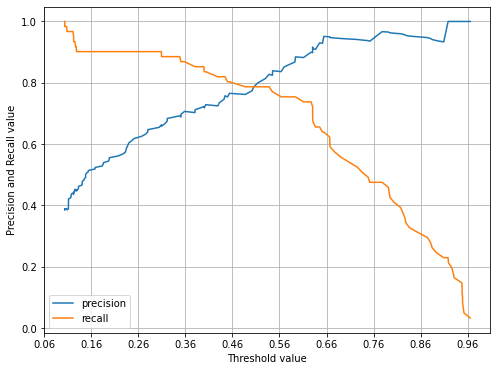

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline


def precision_recall_curve_plot(y_test,pred_proba_c1):
  #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precision, recalls, thresholds=precision_recall_curve(y_test,pred_proba_c1)
  
  #x축을 threshold 값으로, y축은 정밀도,재현율 값으로 각각 plot수행, 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='-',label='precision')
  plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')

  #threshold값 X축의 scale을 0.1단위로 변경
  start,end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  #x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
  plt.legend();plt.grid()
  plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

#임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐
#임곗값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상

# 정밀도와 재현율의 맹점

- Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨
- 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용되면 안됨.

- 정밀도가 100% 되는 법: 확실한 기준이 되는 경우만 Positive로 예측하고 나머지 모두 Negative로 예측 시키기
- 재현율이 100% 되는 법: 모든 환자를 Positive로 예측

# F1 스코어

- 2*(재현율*정밀도)/(재현율+정밀도)

- F1 스코어 API: f1_score()

In [34]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,pred)
print('F1 score:{0:.4f}'.format(f1))

F1 score:0.7805


# 타이타닉 생존자 예측에서 임곗값을 변화시키면서 F1스코어를 포함한 평가지표 구해보기

In [35]:
def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  #F! 스코어 추가
  f1=f1_score(y_test,pred)
  print('오차 행렬')
  print(confusion)
  #f1 score print 추가
  print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},F1:{3:.4f}'.format(accuracy,precision,recall,f1))

thresholds=[0.40,0.45,0.50,0.55,0.60]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도:0.8324,정밀도:0.7183,재현율:0.8361,F1:0.7727
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도:0.8492,정밀도:0.7656,재현율:0.8033,F1:0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492,정밀도:0.7742,재현율:0.7869,F1:0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도:0.8659,정밀도:0.8364,재현율:0.7541,F1:0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도:0.8771,정밀도:0.8824,재현율:0.7377,F1:0.8036


- F1 스코어는 임곗값이 0.6일 때 가장 좋은 값
- 임곗값 0.6인 경우에 재현율이 크게 감소하고 있으니 주의

# ROC 곡선과 AUC

- ROC 곡선(수신자 판단 곡선): 2차 대전 떄 통신 장비 성능 평가를 위해 고안된 수치였음. 일반적으로 의학분야에서 많이 사용. 머신러닝 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표.
- ROC 곡선은 FPR이 변할 때, TPR이 어떻게 변하는 지 나타내는 곡선
- TPR = 재현율 = 민감도 이에 대응하는 지표로는 TNR인 특이성이 존재함. 
- 민감도: 실제값 Positive가 정확이 예측돼야 하는 수준을 나타냄(질병이 있는 사람을 질병이 있는 것으로 판정)
- 특이성: TNR은 실제값 Negative가 정확히 예측돼야 하는 수준을 나타냄(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)

#ROC curve() 이용해 타이타닉 생존자 예측 모델의 FPR,TPR, 임곗값 구해보기

- roc_curve(): ROC 곡선을 구하기 위해 제공되는 API, 반환값은 FRP, TPR, 임계값

In [36]:

from sklearn.metrics import roc_curve

#레이블 값이 1일 때의 예측확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)

#반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임계값을 5 step으로 추출
#thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index=np.arange(1,thresholds.shape[0],5)

print('샘플 추출을 위한 임곗값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index],2))

#5 step 단위로 추출된 임계값에 따른 FPR,TPR 값
print('샘플 임곗값 별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값 별 TPR:',np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값 별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값 별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


- 1에서 점점 작아지면서 FRP이 점점 커짐
- FPR이 점점 커질 떄, TPR이 가파르게 커짐.

#FPR변화에 따른 TPR변화를 ROC곡선으로 시각화

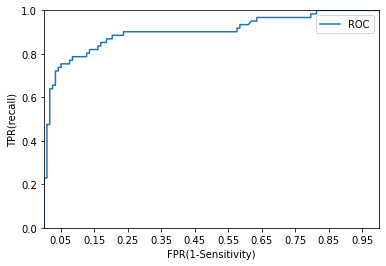

In [37]:
def roc_curve_plot(y_test,pred_proba_c1):
  #임계값에 따른 FPR,TPR 값을 반환받음
  fprs,tprs, thresholds=roc_curve(y_test,pred_proba_c1)
  #ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fprs,tprs,label='ROC')

  #FPR X축의 scale을 0.1단위로 변경, X,Y축 명 설정
  start,end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1);plt.ylim(0,1)
  plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(recall)')
  plt.legend()

roc_curve_plot(y_test,pred_proba[:,1])

- 일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화를 확인할 때 이용하며, 분류 모델의 성능 평가 지표로는 ROC 곡선 면적에 기반한 AUC 값으로 결정한다.


# AUC 면적

- AUC(Area Under Cureve) : ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울수록 모델의 성능이 좋다.
- ROC 곡선이 가파를수록 면적이 1에 가까워진다.
- 앞에서 만든 get_clf_eval 함수에 ROC AUC 값을 측정하는 코드를 추가해보자.

In [39]:
def get_clf_eval(y_test, pred=None, pred_proba=None): #평가 한번에 호출하는 함수
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  #ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))